<a href="https://colab.research.google.com/github/badgujjarajay/fruits-classification/blob/master/fruits_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training the model.**

**Import all the required libraries.**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

**Add Kaggle API (kaggle.json file).**

This will upload kaggle.json to '/content' folder.

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


**Installing Pandas, OS and Setting Environment Variables for Kaggle.**

In [ ]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading dataset from kaggle.**

Dataset [link](https://www.kaggle.com/badgujjarajay/fruits-data).

In [ ]:
!kaggle datasets download -d badgujjarajay/fruits-data

 79% 35.0M/44.1M [00:00<00:00, 58.6MB/s]
100% 44.1M/44.1M [00:00<00:00, 89.9MB/s]


**Extracting the zip file downloaded from kaggle.**

In [ ]:
!unzip "*.zip"

Archive:  fruits-data.zip
  inflating: fruits_data/Apple/00000000.jpg  
  inflating: fruits_data/Apple/00000001.jpg  
  inflating: fruits_data/Apple/00000002.jpg  
  inflating: fruits_data/Apple/00000003.jpg  
  inflating: fruits_data/Apple/00000004.jpg  
  inflating: fruits_data/Apple/00000005.jpg  
  inflating: fruits_data/Apple/00000006.jpg  
  inflating: fruits_data/Apple/00000007.jpg  
  inflating: fruits_data/Apple/00000008.jpg  
  inflating: fruits_data/Apple/00000009.jpg  
  inflating: fruits_data/Apple/00000010.jpg  
  inflating: fruits_data/Apple/00000011.jpg  
  inflating: fruits_data/Apple/00000012.jpg  
  inflating: fruits_data/Apple/00000013.jpg  
  inflating: fruits_data/Apple/00000014.jpg  
  inflating: fruits_data/Apple/00000015.jpg  
  inflating: fruits_data/Apple/00000016.jpg  
  inflating: fruits_data/Apple/00000017.jpg  
  inflating: fruits_data/Apple/00000018.jpg  
  inflating: fruits_data/Apple/00000019.jpg  
  inflating: fruits_data/Apple/00000020.jpg  
  inflat

**Setting path and classes in the dataset.**

In [ ]:
path = 'fruits_data'
classes = os.listdir(path)

**Verifying images and deleting the currupt images.**

In [ ]:
for c in classes:
    print(c)
    verify_images(path + '/' +c, delete=True, max_size=2000)

Apple


Strawberry


Mango


Chikoo


Guava


Pomegranate


Grapes


Pineapple


Watermelon


Banana


# **Data Augmentation**

**Applying transfromations and creating ImageDataBunch.**

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("fruits_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())
data.classes

['Apple',
 'Banana',
 'Chikoo',
 'Grapes',
 'Guava',
 'Mango',
 'Pineapple',
 'Pomegranate',
 'Strawberry',
 'Watermelon']

**Checking total images in the dataset befor applying augmentation techniques.**

In [ ]:
total = 0
for c in enumerate(data.classes):
    images = os.listdir("fruits_data/"+c[1])
    print(c[1])
    img = len(images)
    total += img
    print(img)

print("Total Images")
print(total)

Apple
563
Banana
476
Chikoo
406
Grapes
530
Guava
474
Mango
580
Pineapple
483
Pomegranate
443
Strawberry
534
Watermelon
482
Total Images
4971


**Function to create new images with different brightnesses.**

In [ ]:
def change_brightness(image, folder, name):
  img_counter = folder + '/' + 'brightness' + str(name.split('.')[0])
  idx = 0
  for change in np.linspace(0.2,0.8,2):
    new_img = brightness(image, change)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

**Function to create new images with different contrasts.**

In [ ]:
def change_contrast(image, folder, name):
  img_counter = folder + '/' + 'contrast' + str(name.split('.')[0])
  idx = 0
  for scale in np.exp(np.linspace(log(0.5),log(2),2)):
    new_img = contrast(image, scale)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

**Function to create new dihedral images.**

In [ ]:
def apply_dihedral(image, folder, name):
  img_counter = folder + '/' + 'dihedral' + str(name.split('.')[0])
  idx = 0
  for i in range(1,5,3):
    new_img = dihedral(image, i)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

**Function to create new images after applying jitter.**

In [ ]:
def apply_jitter(image, folder, name):
  img_counter = folder + '/' + 'jitter' + str(name.split('.')[0])
  idx = 0
  for magnitude in np.linspace(-0.05,0.05,2):
    image.jitter(magnitude)
    dest = str(img_counter)+ str(idx) +".jpg"
    image.save(dest)
    idx += 1

**Calling the above augmentation functions for all the images present in the dataset and create new images after applying agumentation functions.**

In [ ]:
for c in data.classes:
  images = os.listdir("fruits_data/"+c)
  print(c)
  for img in images:
    change_brightness(open_image("fruits_data/"+c+'/'+img), "fruits_data/"+c, img)
  print('  change_brightness DONE')
  
  for img in images:
    change_contrast(open_image("fruits_data/"+c+'/'+img), "fruits_data/"+c, img)
  print('  change_contrast DONE')
  
  for img in images:
    apply_dihedral(open_image("fruits_data/"+c+'/'+img), "fruits_data/"+c, img)
  print('  apply_dihedral DONE')
  
  for img in images:
    apply_jitter(open_image("fruits_data/"+c+'/'+img), "fruits_data/"+c, img)
  print('  apply_jitter DONE')

Apple
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Banana
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Chikoo
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Grapes
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Guava
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Mango
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Pineapple
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Pomegranate
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Strawberry
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE
Watermelon
  change_brightness DONE
  change_contrast DONE
  apply_dihedral DONE
  apply_jitter DONE


**Checking total images in the dataset after applying augmentations.**

In [ ]:
total = 0
for c in data.classes:
    images = os.listdir("fruits_data/"+c)
    print(c)
    img = len(images)
    total += img
    print(img)

print("Total Images")
print(total)

Apple
5067
Banana
4284
Chikoo
3654
Grapes
4770
Guava
4266
Mango
5220
Pineapple
4347
Pomegranate
3987
Strawberry
4806
Watermelon
4338
Total Images
44739


**Showing some images from the dataset.**

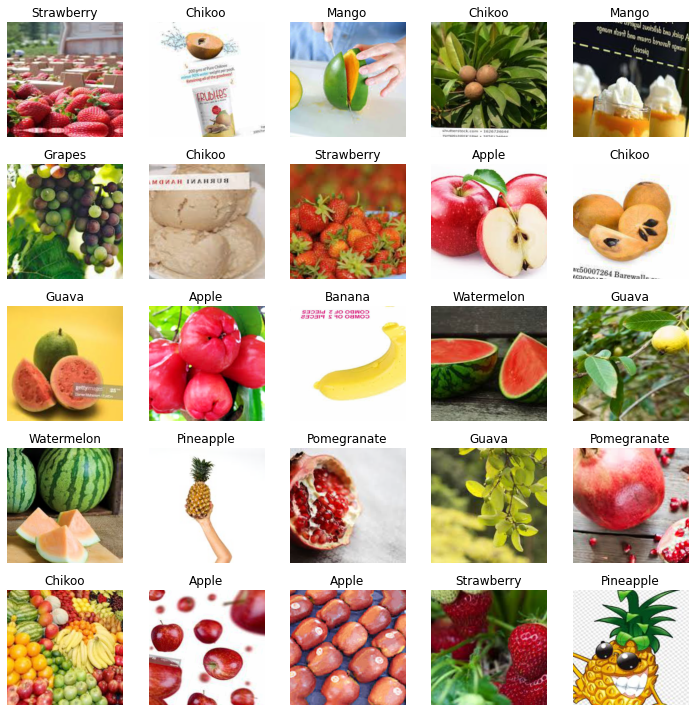

In [ ]:
data.show_batch(rows=5,figsize=(10,10))

# **Training Model**

**Calling resnet50 model into learn variable.**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


**Training the dataset to the model.**

6 epochs are trained here.

In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.325087,0.673623,0.834004,01:20
1,0.935379,0.641008,0.827968,01:14
2,0.676563,0.510919,0.853119,01:14
3,0.517731,0.449472,0.877264,01:15
4,0.393547,0.428695,0.882294,01:14
5,0.321785,0.423704,0.887324,01:13


**Saving the learn model into /content so that it can be loaded later if required.**

In [ ]:
learn.save('Stage-1')

# **Results**

**Finding and plotting the top losses.**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

**Images shown here:**

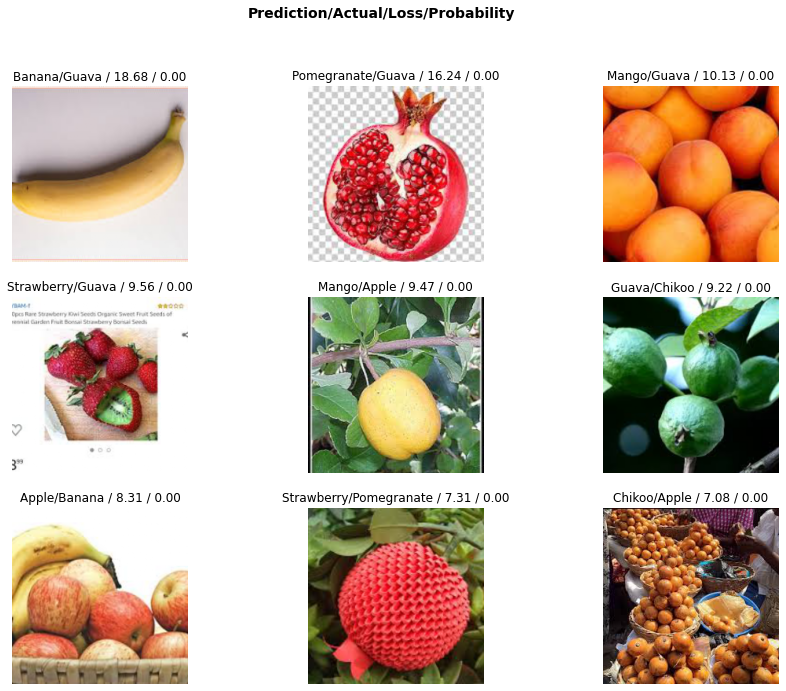

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

**Confusion Matrix:**

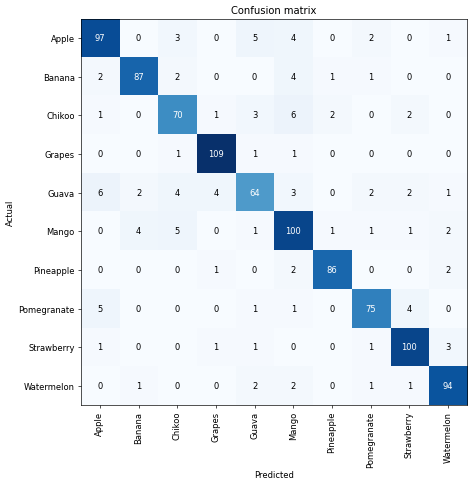

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

# **Unfreezing, Fine tuning and Learing rate.**

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.408534,0.525774,0.851107,01:37
1,0.611646,0.758679,0.794769,01:35
2,0.565693,0.531628,0.846076,01:35
3,0.395292,0.436675,0.879276,01:35
4,0.237563,0.409895,0.900402,01:34
5,0.139881,0.398274,0.907445,01:35


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


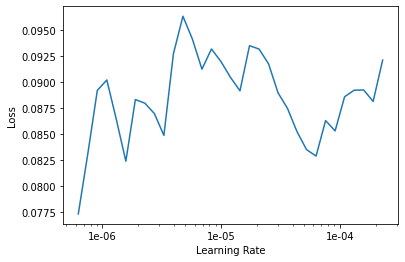

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.091418,0.397421,0.906439,01:34
1,0.076968,0.397315,0.906439,01:35


**Now we have a accuracy of 90.64%.**

**Mount Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Creating folders to save Stage.pth and export.pkl.**

In [ ]:
dir = "/content/drive/My Drive/Geeksman_AISquad_Project1_AJAY"
os.makedirs(dir, exist_ok=True)

**Saving Stage-1.pth file to the location at variable 'dir'.**

In [ ]:
learn.save(dir+"/Stage-1")

**Saving export.pkl file to the location at variable 'dir'.**

In [ ]:
learn.export(dir+"/export.pkl")

**Upload export.pkl so that the file can be publically accessed.**

In [ ]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

'https://drive.google.com/uc?id=1Guy3lMmpXtA1nNgn-w6mE3n7WCShQPUc'

**We have done with traing part and model is saved in Google Drive and can also be accessed from the [link](https://drive.google.com/uc?id=1Guy3lMmpXtA1nNgn-w6mE3n7WCShQPUc).**